# Homework 4



# Done by Mingzuo Sun


In [30]:
##
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK # Prevents import error from Demos repo
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.3f}".format(number)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

# Question 1.
1.
(i) If the employed consumer loses his job in period 0, the total benifits he will get discounted to period -1 will be $lim_{n\to\infty} \frac{1}{R}(N_{o} +\frac{N_{o}}{R}+...+\frac{N_{o}}{R^n})=\frac{N_{o}}{r}$

If the leader i infintely risk-averse, he will lend the borrower any amount less than $\frac{N_{o}}{r}$ in period -1.

(ii) If the RIC fails, then the PDV of comsumption in the future will go to infinity making the solution of consumer's problem less sensible(under perfect foresight). When a consumer ends his employment, he will be in a scenario of perfect foresignt. If his $A_{\scriptsize-1}$ is larger than $\frac{N_{o}}{r}$, that means he has positive overall wealth at that time, then he will choose positive consumption throughout his unemployed life with RIC holds.

(iii) In both of the two cases, the unemployed consumer receives the benefits with a PDV at period 0 being $\frac{N_{o}R}{r}$. So the intertemporal budget constraints hold the same for the consumer. Hence he will choose the same consumption path.

(iv) from $H_-1=\zeta w_{-1}l_{-1}=h_{-1}w_{-1}l_{-1}$, we have $h_{-1}=\zeta$

From $H_-1=\frac{N_o}{r}=\frac{\eta_ow_o}{r}=h_{-1}w_{-1}l_{-1}$, we know $h_{-1}=\frac{\eta w_{o}\ l_{o}}{rw_{-1}\ l_{-1}}$

(v) In a TBS model, the consumer with market resources m will choose $\mathbf{c(m)}$as his comsumption level. While in our model, a consumer with market resources $\mathbf{m-\underline{h}}$ can borrow at most $\mathbf{\underline{h}}$, so he actually can attain market resources at m level, then he will also choose $\mathbf{c(m)}$ to maximize his utility.
A strict proof:
denote $p_t=w_tl_t$

In TBS model, from the definition of c(m), we know c(m) solves the following problem：


$max E_{t} \beta^{t} u(c_{t}p_t)$ 

s.t. $c_{t}\leq m_t-b_t$, $b_t\geq0$, and $m_{t+1}=b_{t}R/\gamma+1$

Note: Here we add $b_t\geq0$ to the constraints, but it does not matter because the consumer will never borrow in a TBS model.

In our model, $\hat c(m_t-\underline h)$ solves the following problem:

$max E_{t} \beta^{t} u(c_{t}p_t)$

s.t. $c_{t}\leq \hat m_t-b_t$,  $-b_t-\underline h\Gamma\leq 0$ and $\hat m_{t+1}=b_{t}R/\gamma+1$



The intertemporal budget constraints of both these two problems are actually identical when $\hat m_t = m_t - \underline h\Gamma$, so $c(m_t)=\hat c(m_t-\underline h\Gamma)$

So the introduction of such a system is simply to shift the consumption function to the left $\underline h$.


Now we plot the graph in which the such a leftward shift that is large enough so that the target ratio of bank balances b is negative

In [31]:
# Define a parameter dictionary and representation of the agents for the tractable buffer stock model
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)
MyTBStype.solve()



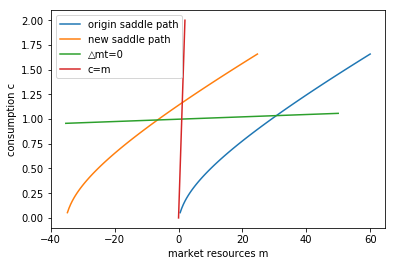

In [32]:
#####The following parameters are taken as defalt
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)
MyTBStype.solve()
U=TBS_dictionary['UnempPrb']
rho=TBS_dictionary['CRRA']
beta=TBS_dictionary['DiscFac']
Rfree=TBS_dictionary['Rfree']
gamma=TBS_dictionary['PermGroFac']/(1-U)
kai=1-((Rfree*beta)**(1/rho))/Rfree
thorn=(Rfree*beta)**(1/rho)
thorn_gamma=thorn/gamma
pai=(((thorn_gamma**(-rho)-1)/U)+1)**(1/rho)
R=MyTBStype.Rfree/MyTBStype.PermGroFacCmp                
m=np.linspace(0,60,120)
c = MyTBStype.solution[0].cFunc(m) ##c(m_t)
η=0.35
rfree=Rfree-1
h=gamma*η/rfree
m_defalt=m-h
c_defalt = MyTBStype.solution[0].cFunc(m_defalt+h)
m2_defalt=np.linspace(min(m_defalt),50,200)
c2_defalt= (1-1/R)*m2_defalt+(1/R)       
x=np.linspace(0,2,20)
y=x
plt.plot(m,c, label='origin saddle path' )
plt.plot(m_defalt,c_defalt, label='new saddle path')
plt.plot(m2_defalt,c2_defalt, label='△mt=0')
plt.plot(x,y, label='c=m')
plt.xlabel('market resources m') # x axis label
plt.ylabel('consumption c')      # y axis label
plt.legend()                       # show legend
plt.show()                       # plot chart



(vi)  An expansion of unemployment benefits goes with an increase of $\eta$. The borrowing bound for employed comsumer is  $\underline h= \eta/r$.  So $\underline h$ will increase, which leads to a relaxaition of a ' Natural borrowing constraint'. 

Part b

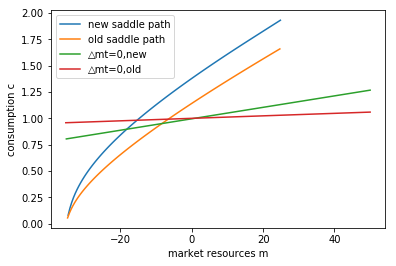

In [33]:
####(i)    The unemployment rate now decreases from 00625 to 0.002
 

TBS_dictionary =  {'UnempPrb' : .002,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype1 = TractableConsumerType(**TBS_dictionary)
MyTBStype1.solve()

U=TBS_dictionary['UnempPrb']
rho=TBS_dictionary['CRRA']
beta=TBS_dictionary['DiscFac']
Rfree=TBS_dictionary['Rfree']
gamma=TBS_dictionary['PermGroFac']/(1-U)
kai=1-((Rfree*beta)**(1/rho))/Rfree
thorn=(Rfree*beta)**(1/rho)
thorn_gamma=thorn/gamma
pai=(((thorn_gamma**(-rho)-1)/U)+1)**(1/rho)
R=MyTBStype1.Rfree/MyTBStype1.PermGroFacCmp

m=np.linspace(0,60,120)

η=0.35
rfree=Rfree-1
h1=gamma*η/rfree

m_shift1=m-h1
c_shift1 = MyTBStype1.solution[0].cFunc(m_shift1+h1)

m2=np.linspace(min(m_shift1),50,200)
c2= (1-1/R)*m2+(1/R)       


plt.plot(m_shift1,c_shift1, label='new saddle path')
plt.plot(m_defalt,c_defalt, label='old saddle path')
plt.plot(m2,c2, label='△mt=0,new')
plt.plot(m2_defalt,c2_defalt, label='△mt=0,old')

plt.xlabel('market resources m') # x axis label
plt.ylabel('consumption c')      # y axis label
plt.legend()                       # show legend
plt.show()                       # plot chart



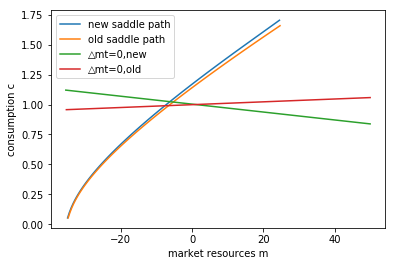

In [34]:
####(ii)  The permanent income growth goes up to 1.007
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.007,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype2 = TractableConsumerType(**TBS_dictionary)
MyTBStype2.solve()

U=TBS_dictionary['UnempPrb']
rho=TBS_dictionary['CRRA']
beta=TBS_dictionary['DiscFac']
Rfree=TBS_dictionary['Rfree']
gamma=TBS_dictionary['PermGroFac']/(1-U)
kai=1-((Rfree*beta)**(1/rho))/Rfree
thorn=(Rfree*beta)**(1/rho)
thorn_gamma=thorn/gamma
pai=(((thorn_gamma**(-rho)-1)/U)+1)**(1/rho)
R=MyTBStype2.Rfree/MyTBStype2.PermGroFacCmp

m=np.linspace(0,60,120)

η=0.35
rfree=Rfree-1
h2=gamma*η/rfree


m_shift2=m-h2

c_shift2 = MyTBStype2.solution[0].cFunc(m_shift2+h2)

m2=np.linspace(min(m_shift2),50,200)

c2= (1-1/R)*m2+(1/R)       

plt.plot(m_shift2,c_shift2, label='new saddle path')
plt.plot(m_defalt,c_defalt, label='old saddle path')
plt.plot(m2,c2, label='△mt=0,new')
plt.plot(m2_defalt,c2_defalt, label='△mt=0,old')

plt.xlabel('market resources m') # x axis label
plt.ylabel('consumption c')      # y axis label
plt.legend()                       # show legend
plt.show()                       # plot chart

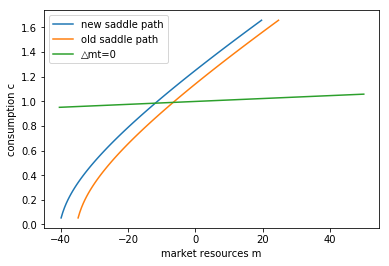

In [35]:
####（iii)  η goes from 0.35 to 0.40
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype3 = TractableConsumerType(**TBS_dictionary)
MyTBStype3.solve()

U=TBS_dictionary['UnempPrb']
rho=TBS_dictionary['CRRA']
beta=TBS_dictionary['DiscFac']
Rfree=TBS_dictionary['Rfree']
gamma=TBS_dictionary['PermGroFac']/(1-U)
kai=1-((Rfree*beta)**(1/rho))/Rfree
thorn=(Rfree*beta)**(1/rho)
thorn_gamma=thorn/gamma
pai=(((thorn_gamma**(-rho)-1)/U)+1)**(1/rho)
R=MyTBStype3.Rfree/MyTBStype3.PermGroFacCmp

m=np.linspace(0,60,120)

η=0.40
rfree=Rfree-1
h3=gamma*η/rfree


m_shift3=m-h3

c_shift3 = MyTBStype3.solution[0].cFunc(m_shift3+h3)

m2=np.linspace(min(m_shift3),50,200)

c2= (1-1/R)*m2+(1/R)       

plt.plot(m_shift3,c_shift3, label='new saddle path')
plt.plot(m_defalt,c_defalt, label='old saddle path')
plt.plot(m2,c2, label='△mt=0')


plt.xlabel('market resources m') # x axis label
plt.ylabel('consumption c')      # y axis label
plt.legend()                       # show legend
plt.show()                       # plot chart

in all of these 3 cases, the saving rate's movement follows the same pattern as the graph below shows.

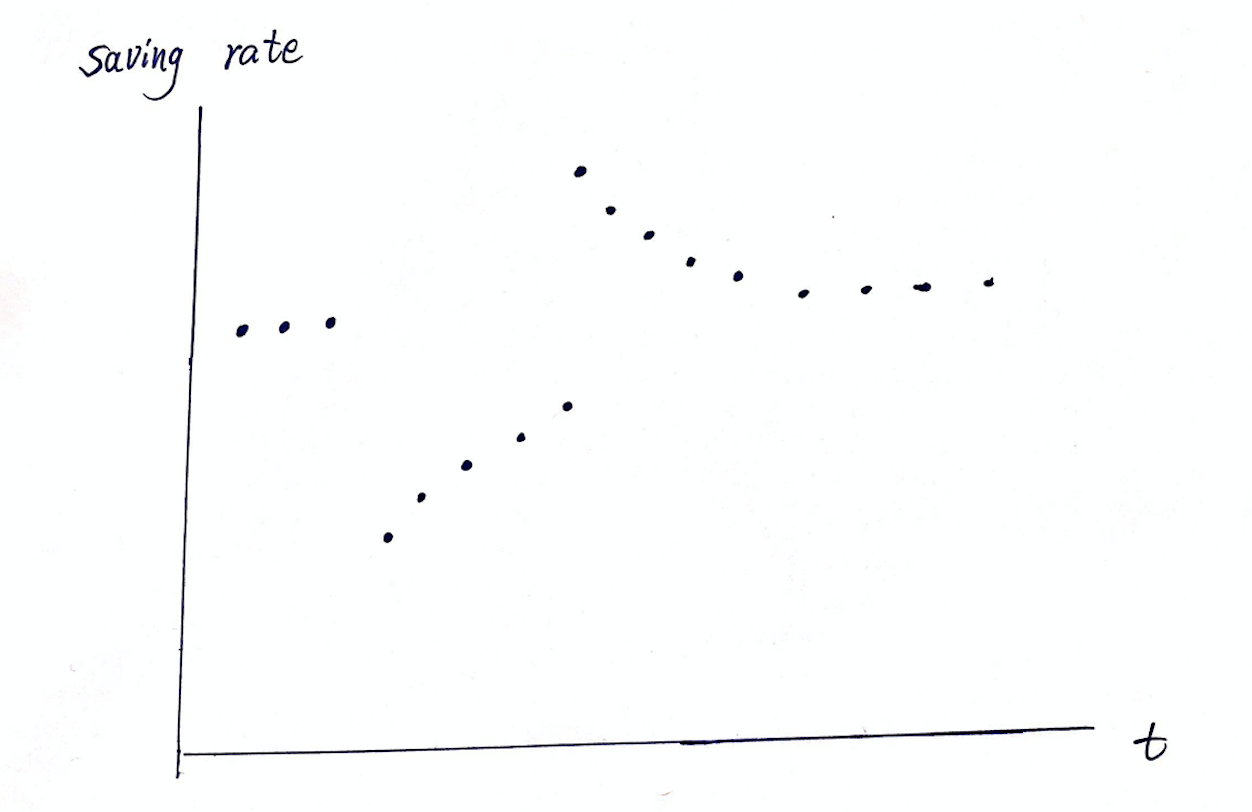

In [36]:

PATH = "/Users/sunmingzuo/Desktop/"
Image(filename = PATH + "graph.png", width=500, height=500)

 # Quesiton 2

In this question, we assume that there are two kinds of Lucas trees in this economy. One is S, the other is O. Also, we need to assume that the number of S is 1, and the nubmer of O is N(N>>1).

Here the Consumer's Problem looks like:

$max E_tu(c_t)$ s.t $ m_t=(p_t ^s + d_t ^s)k_{t} ^s + (p_t ^o + d_t ^o)k_{t} ^o$ and $m_{t+1}=(m_t-c_t)*R_{t+1}$ where $ R_{t+1}=\frac{(p_{t+1} ^s\ +\ d_{t+1} ^s\ ) \ k_{t+1} ^s}{m_t - c_t}+\frac{(p_{t+1} ^o\ +\ d_{t+1} ^o\ ) \ k_{t+1} ^o}{m_t - c_t}$

Combining the Euler Equation and Market Clear conditions, we have such two equations hold

$\frac{P_t ^s+NP_t ^o}{d_t ^s+Nd_t ^o}=\frac{1}{\theta}$, where $ \beta=\frac{1}{1+\theta}$

and

$E_t(R_{t+1} ^s-R_{t+1} ^o)=Cov_t(dlog(Nd_{t+1} ^o+d_{t+1} ^s), R_{t+1} ^s-R_{t+1} ^o)$, where
$R_{t+1} ^s=\frac{(p_{t+1} ^s\ +\ d_{t+1} ^s\ )}{p_t ^s}$and $R_{t+1} ^o=\frac{(p_{t+1} ^o\ +\ d_{t+1} ^o\ )}{p_t ^o}$

when N is large enough, we have $p_t ^o = d_t ^o/\theta$, which could approximately be seen as unvarying during periods.


(a) According to the conclusion of Lucas Tree model, the price will proportional to the dividend in that period. Then if the dividends of per share of S drops to the half origin level, then the price of $P_s$ should go down.  $p_t ^s/d_t ^s$ will remain at the origin level.  However, for assets O, because its market size is far larger than S, and there is no extra change happening on its dividends, its price and price-dividends ratio should keep unchanging.

(b)If the variance of dividends associated with holding a share of S will be permanently higher, then $Cov_t(dlog(Nd_{t+1} ^o+d_{t+1} ^s), R_{t+1} ^s-R_{t+1} ^o)$ will be higher. Hence $E_t(R_{t+1} ^s-R_{t+1} ^o)$ will be higher. If the return of assets goes up, then the price of it will go down if keeping the stream of its dividends unchanged. $p_t ^o$ and $p_t ^o/d_t ^o$ will remain constant.

(c) From the $E_t(R_{t+1} ^s-R_{t+1} ^o)=\rho Cov_t(dlog(Nd_{t+1} ^o+d_{t+1} ^s), R_{t+1} ^s-R_{t+1} ^o)$, we know if $\rho$ goes up, the $E_t(R_{t+1} ^s-R_{t+1} ^o)$ will increase correspondently, thus decreasing the price of S. 